# Problem definition

In [1]:
using GeoStats
using Plots; gr(size=(900,400))

geodata = PointSetData(Dict(:variable => [1.,0.,1.]), [25. 50. 75.;  25. 75. 50.])
domain  = RegularGrid{Float64}(100,100)
problem = EstimationProblem(geodata, domain, :variable)

2D EstimationProblem
  data:      3 PointSetData{Float64,2}
  domain:    100×100 RegularGrid{Float64,2}
  variables: variable (Float64)

# Solver options

The user can specify the number of neighbors (default to all data locations) and a distance from the [Distances.jl](https://github.com/JuliaStats/Distances.jl) package (default to Euclidean). If the number of neighbors is set to 1, the algorithm reduces to a simple tesselation algorithm.

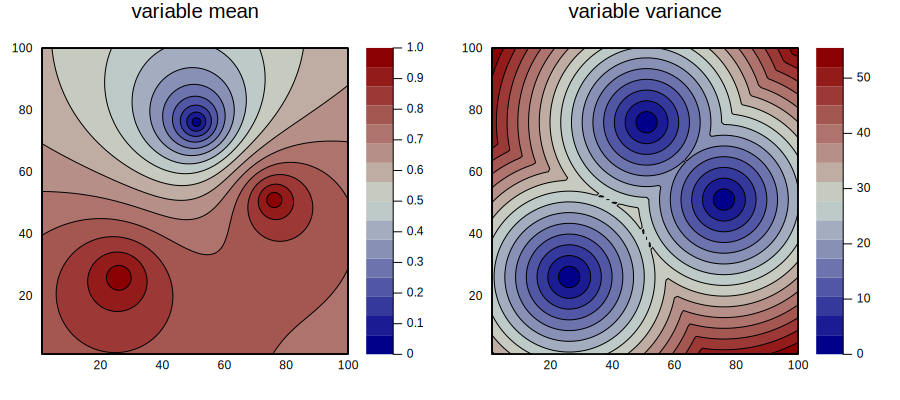

In [2]:
using InverseDistanceWeighting

# use all data locations
solution = solve(problem, InvDistWeight())

contourf(solution)

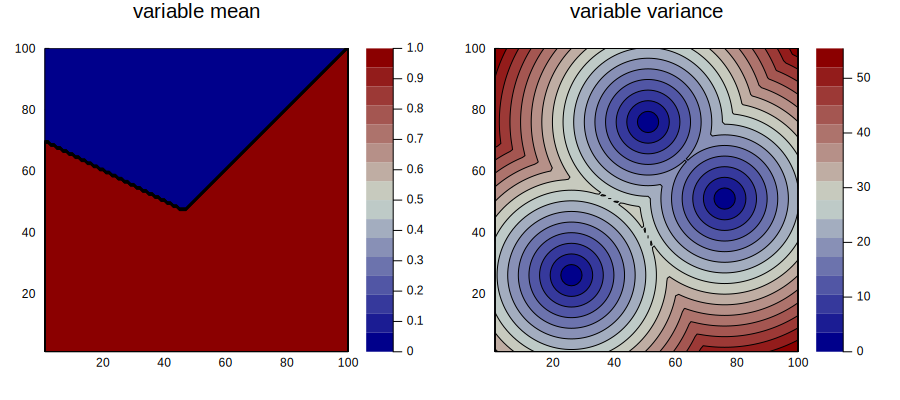

In [3]:
# 1 nearest neighbor => simple tesselation
solver = InvDistWeight(:variable => (neighbors=1,))

solution = solve(problem, solver)

contourf(solution)

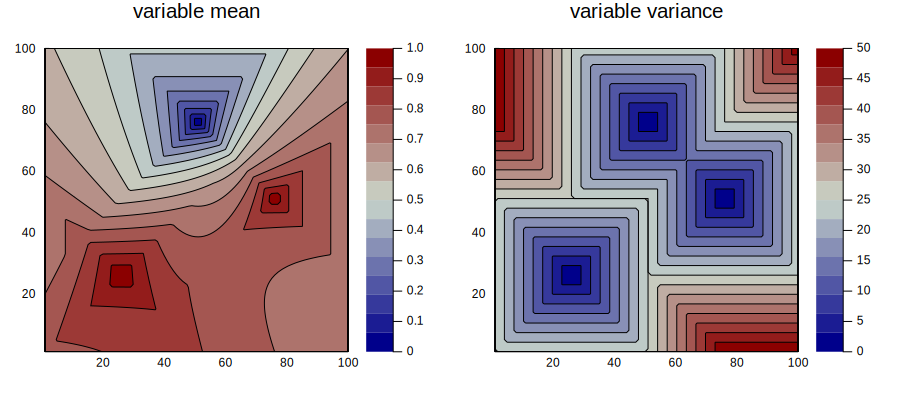

In [4]:
# custom metric
solver = InvDistWeight(:variable => (distance=Chebyshev(),))

solution = solve(problem, solver)

contourf(solution)